<a href="https://colab.research.google.com/github/UliksSekiraqa/NotebookProjects/blob/master/CreditCardFraudDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install kaggle

In [ ]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

# Then move kaggle.json into the folder where the API expects to find it.
!mkdir -p ~/.kaggle/ && mv kaggle.json ~/.kaggle/ && chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json
User uploaded file "kaggle.json" with length 62 bytes


In [ ]:
!kaggle datasets download -d mlg-ulb/creditcardfraud

 96% 63.0M/66.0M [00:02<00:00, 41.3MB/s]
100% 66.0M/66.0M [00:02<00:00, 29.4MB/s]


In [ ]:
!unzip creditcardfraud.zip

Archive:  creditcardfraud.zip
  inflating: creditcard.csv          


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Accuracy: 0.9989817773252344
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.71      0.69      0.70        98

    accuracy                           1.00     56962
   macro avg       0.85      0.85      0.85     56962
weighted avg       1.00      1.00      1.00     56962



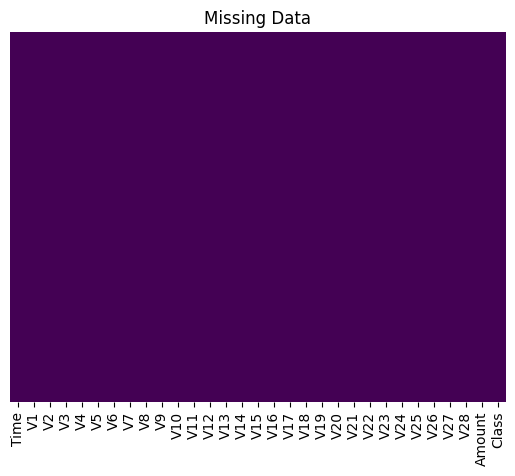

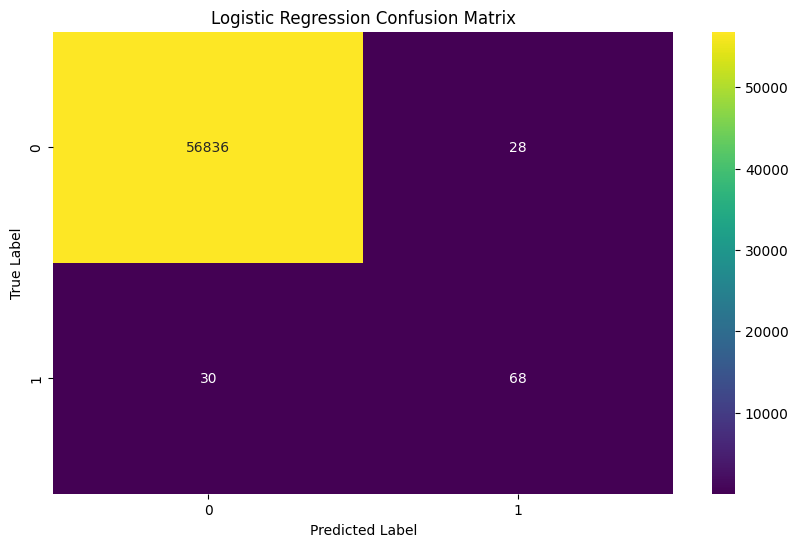

Random Forest Accuracy: 0.9995611109160493
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.97      0.77      0.86        98

    accuracy                           1.00     56962
   macro avg       0.99      0.88      0.93     56962
weighted avg       1.00      1.00      1.00     56962



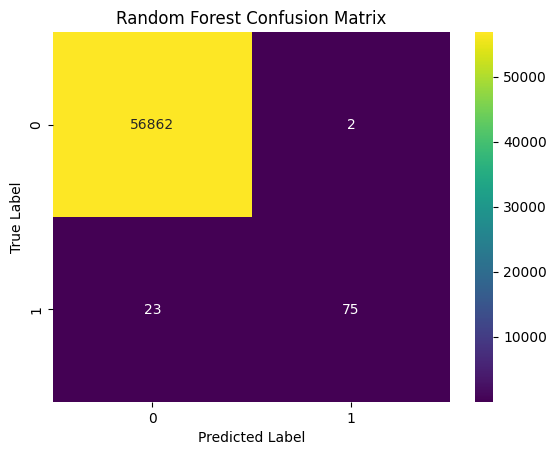

In [7]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load the Credit Card Fraud Detection dataset
credit_card_data = pd.read_csv("creditcard.csv")

# Display the first few rows of the dataset
credit_card_data.head()

# Check for missing values
credit_card_data.isnull().sum()

# Visualize missing values
sns.heatmap(credit_card_data.isnull(), yticklabels=False, cbar=False, cmap='viridis')
plt.title('Missing Data')

# Explore data distribution
plt.figure(figsize=(10, 6))
sns.histplot(credit_card_data['Class'], bins=2, kde=False)
plt.title('Class Distribution (0: No Fraud, 1: Fraud)')

# Split dataset into features and target variable
X = credit_card_data.drop('Class', axis=1)
y = credit_card_data['Class']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Logistic Regression classifier
lr_classifier = LogisticRegression()
lr_classifier.fit(X_train, y_train)

# Make predictions
y_pred_lr = lr_classifier.predict(X_test)

# Evaluate the model
accuracy_lr = accuracy_score(y_test, y_pred_lr)
print(f'Logistic Regression Accuracy: {accuracy_lr}')

# Generate classification report and confusion matrix
print(classification_report(y_test, y_pred_lr))
conf_matrix_lr = confusion_matrix(y_test, y_pred_lr)
sns.heatmap(conf_matrix_lr, annot=True, fmt='d', cmap='viridis')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Logistic Regression Confusion Matrix')
plt.show()

# Train Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_classifier.predict(X_test)

# Evaluate the model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f'Random Forest Accuracy: {accuracy_rf}')

# Generate classification report and confusion matrix
print(classification_report(y_test, y_pred_rf))
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='viridis')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Random Forest Confusion Matrix')
plt.show()


# New section